the effect of data preprocessing on the prediction

In [45]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures, QuantileTransformer, OneHotEncoder#net yet used
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [3]:
data = pd.read_csv('../dataset/Pima.csv')

In [4]:
data.isnull().sum()

6        0
148      0
72       0
35       0
0        0
33.6     0
0.627    0
50       0
1        0
dtype: int64

In [6]:
X = data.drop(['1'],axis= 1)
y = data['1']

In [16]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size =0.3,random_state=23)

In [18]:
rfc = RandomForestClassifier()
knn = KNeighborsRegressor()
clf = LinearRegression()

In [19]:
rfc.fit(X_train, y_train)
knn.fit(X_train, y_train)
clf.fit(X_train, y_train)

LinearRegression()

In [20]:
pred_rfc = rfc.predict(X_test)
pred_knn = knn.predict(X_test)
pred_clf = clf.predict(X_test)

In [26]:
print(classification_report(y_test, pred_rfc))
print(classification_report(y_test,  np.round(abs(pred_knn))))
print(classification_report(y_test, np.round(abs(pred_clf))))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       156
           1       0.65      0.68      0.66        75

    accuracy                           0.77       231
   macro avg       0.74      0.75      0.75       231
weighted avg       0.78      0.77      0.78       231

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       156
           1       0.57      0.52      0.55        75

    accuracy                           0.72       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.71      0.72      0.71       231

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       156
           1       0.71      0.61      0.66        75

    accuracy                           0.79       231
   macro avg       0.77      0.75      0.75       231
weighted avg       0.79      0.79      0.79       231



In [31]:
recall_list=[]
accuracy_list = []
indexs = [1,2,3]
recall_list.append(recall_score(y_test,pred_rfc))
recall_list.append(recall_score(y_test,  np.round(abs(pred_knn))))
recall_list.append(recall_score(y_test,  np.round(abs(pred_clf))))
accuracy_list.append(accuracy_score(y_test,pred_rfc))
accuracy_list.append(accuracy_score(y_test,  np.round(abs(pred_knn))))
accuracy_list.append(accuracy_score(y_test,  np.round(abs(pred_clf))))

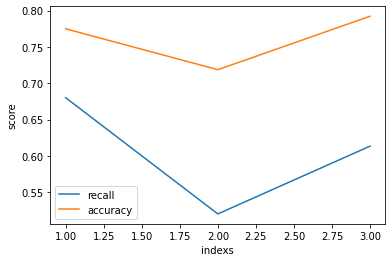

In [32]:
plt.plot(indexs, recall_list, label="recall")
plt.plot(indexs, accuracy_list, label="accuracy")
plt.ylabel("score")
plt.xlabel("indexs")
plt.legend()

transformation with StandardScaler

In [34]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", RandomForestClassifier())
])
pipe2 = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])
pipe3 = Pipeline([
    ("scale", StandardScaler()),
    ("model", LinearRegression())
])

In [37]:
pred_rfc = pipe.fit(X_train, y_train).predict(X_test)
pred_knn = pipe2.fit(X_train, y_train).predict(X_test)
pred_clf = pipe3.fit(X_train, y_train).predict(X_test)


In [38]:
print(classification_report(y_test, pred_rfc))
print(classification_report(y_test,  np.round(abs(pred_knn))))
print(classification_report(y_test, np.round(abs(pred_clf))))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       156
           1       0.68      0.61      0.64        75

    accuracy                           0.78       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.77      0.78      0.78       231

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       156
           1       0.58      0.57      0.58        75

    accuracy                           0.73       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.73      0.73      0.73       231

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       156
           1       0.71      0.61      0.66        75

    accuracy                           0.79       231
   macro avg       0.77      0.75      0.75       231
weighted avg       0.79      0.79      0.79       231



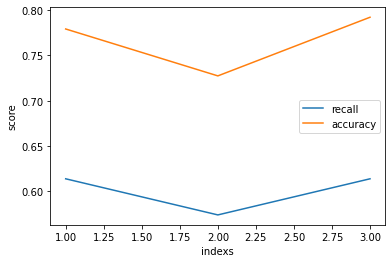

In [39]:
recall_list=[]
accuracy_list = []
indexs = [1,2,3]
recall_list.append(recall_score(y_test,pred_rfc))
recall_list.append(recall_score(y_test,  np.round(abs(pred_knn))))
recall_list.append(recall_score(y_test,  np.round(abs(pred_clf))))
accuracy_list.append(accuracy_score(y_test,pred_rfc))
accuracy_list.append(accuracy_score(y_test,  np.round(abs(pred_knn))))
accuracy_list.append(accuracy_score(y_test,  np.round(abs(pred_clf))))
plt.plot(indexs, recall_list, label="recall")
plt.plot(indexs, accuracy_list, label="accuracy")
plt.ylabel("score")
plt.xlabel("indexs")
plt.legend()

transformation with QuantileTransformer

In [40]:
pipe = Pipeline([
    ("scale", QuantileTransformer(n_quantiles=500)),
    ("model", RandomForestClassifier())
])
pipe2 = Pipeline([
    ("scale", QuantileTransformer(n_quantiles=500)),
    ("model", KNeighborsRegressor())
])
pipe3 = Pipeline([
    ("scale", QuantileTransformer(n_quantiles=500)),
    ("model", LinearRegression())
])

[0.6133333333333333, 0.5733333333333334, 0.6133333333333333]

In [41]:
pred_rfc = pipe.fit(X_train, y_train).predict(X_test)
pred_knn = pipe2.fit(X_train, y_train).predict(X_test)
pred_clf = pipe3.fit(X_train, y_train).predict(X_test)


In [42]:
print(classification_report(y_test, pred_rfc))
print(classification_report(y_test,  np.round(abs(pred_knn))))
print(classification_report(y_test, np.round(abs(pred_clf))))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       156
           1       0.65      0.67      0.66        75

    accuracy                           0.77       231
   macro avg       0.74      0.75      0.75       231
weighted avg       0.78      0.77      0.78       231

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       156
           1       0.58      0.57      0.58        75

    accuracy                           0.73       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.73      0.73      0.73       231

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       156
           1       0.71      0.61      0.66        75

    accuracy                           0.79       231
   macro avg       0.77      0.75      0.75       231
weighted avg       0.79      0.79      0.79       231



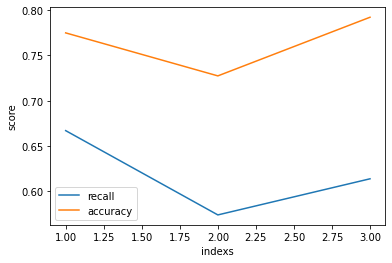

In [43]:
recall_list=[]
accuracy_list = []
indexs = [1,2,3]
recall_list.append(recall_score(y_test,pred_rfc))
recall_list.append(recall_score(y_test,  np.round(abs(pred_knn))))
recall_list.append(recall_score(y_test,  np.round(abs(pred_clf))))
accuracy_list.append(accuracy_score(y_test,pred_rfc))
accuracy_list.append(accuracy_score(y_test,  np.round(abs(pred_knn))))
accuracy_list.append(accuracy_score(y_test,  np.round(abs(pred_clf))))
plt.plot(indexs, recall_list, label="recall")
plt.plot(indexs, accuracy_list, label="accuracy")
plt.ylabel("score")
plt.xlabel("indexs")
plt.legend()

In [44]:
recall_list

[0.6666666666666666, 0.5733333333333334, 0.6133333333333333]

transformation with polynomialFeatures

In [46]:
pipe = Pipeline([
    ("scale", PolynomialFeatures()),
    ("model", RandomForestClassifier())
])
pipe2 = Pipeline([
    ("scale", PolynomialFeatures()),
    ("model", KNeighborsRegressor())
])
pipe3 = Pipeline([
    ("scale", PolynomialFeatures()),
    ("model", LinearRegression())
])

In [47]:
pred_rfc = pipe.fit(X_train, y_train).predict(X_test)
pred_knn = pipe2.fit(X_train, y_train).predict(X_test)
pred_clf = pipe3.fit(X_train, y_train).predict(X_test)

In [56]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test,  np.round(abs(pred_knn))))
print(confusion_matrix(y_test,  np.round(abs(pred_knn))))
print(classification_report(y_test, np.round(abs(pred_clf))))
print(confusion_matrix(y_test, np.round(abs(pred_clf))))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       156
           1       0.66      0.64      0.65        75

    accuracy                           0.77       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.77      0.77      0.77       231

[[131  25]
 [ 27  48]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       156
           1       0.56      0.52      0.54        75

    accuracy                           0.71       231
   macro avg       0.67      0.66      0.66       231
weighted avg       0.71      0.71      0.71       231

[[125  31]
 [ 36  39]]
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       156
         1.0       0.66      0.57      0.61        75
         2.0       0.00      0.00      0.00         0

    accuracy                           0.77       231
   macro avg       0.49     

C:\Users\Bonas Nelson\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bonas Nelson\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bonas Nelson\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

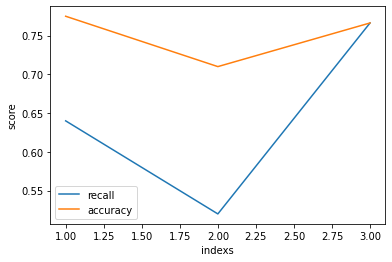

In [54]:
recall_list=[]
accuracy_list = []
indexs = [1,2,3]
recall_list.append(recall_score(y_test,pred_rfc))
recall_list.append(recall_score(y_test,  np.round(abs(pred_knn))))
recall_list.append(recall_score(y_test,  np.round(abs(pred_clf)), average='micro'))
accuracy_list.append(accuracy_score(y_test,pred_rfc))
accuracy_list.append(accuracy_score(y_test,  np.round(abs(pred_knn))))
accuracy_list.append(accuracy_score(y_test,  np.round(abs(pred_clf))))
plt.plot(indexs, recall_list, label="recall")
plt.plot(indexs, accuracy_list, label="accuracy")
plt.ylabel("score")
plt.xlabel("indexs")
plt.legend()

In [55]:
print(recall_list)
print(accuracy_list)

[0.64, 0.52, 0.7662337662337663]
[0.7748917748917749, 0.70995670995671, 0.7662337662337663]
